In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, time
sys.path.append('./models')
import stft as STFT
import sineModel as SM
import IPython
import utilFunctions as UF

class AudioSineModel:
    def __init__(self, filepath):        
        (fs, x) = UF.wavread(filepath)
        w = np.blackman(2047)
        self.filepath= filepath
        N = 4096
        H = 150
        t = -80
        minSineDur = 0.15
        maxnSines = 15
        mX, pX = STFT.stftAnal(x, w, N, H)
        tfreq, tmag, tphase = SM.sineModelAnal(x, fs, w, N, H, t, maxnSines, minSineDur)

        plt.figure(1, figsize=(12.5, 5))
        maxplotfreq = 5000.0
        maxplotbin = int(N*maxplotfreq/fs)
        numFrames = int(mX[:,0].size)
        frmTime = H*np.arange(numFrames)/float(fs)                             
        binFreq = np.arange(maxplotbin+1)*float(fs)/N                         
        #plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:,:maxplotbin+1]))
        plt.autoscale(tight=True)

        tracks = tfreq*np.less(tfreq, maxplotfreq)
        tracks[tracks<=0] = np.nan
        #print tracks[20]
        plt.plot(frmTime, tracks, color='k', lw=1.5)
        plt.autoscale(tight=True)
        plt.title('Sinusoidal tracks - song A')        
        plt.tight_layout()        
        plt.show()

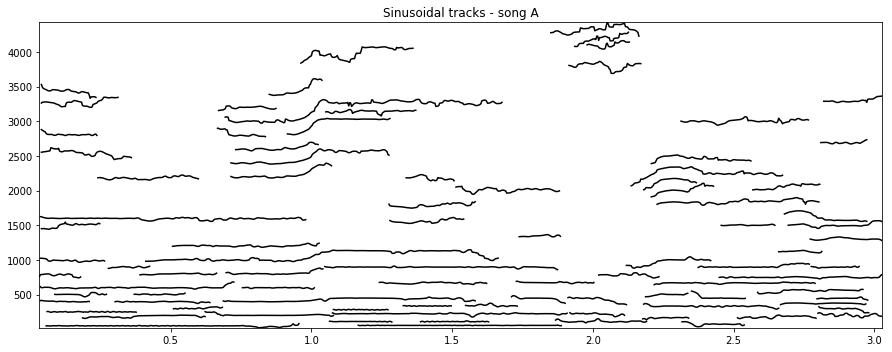

In [30]:
a = AudioSineModel('./audioa.wav')

In [31]:
IPython.display.Audio(a.filepath)

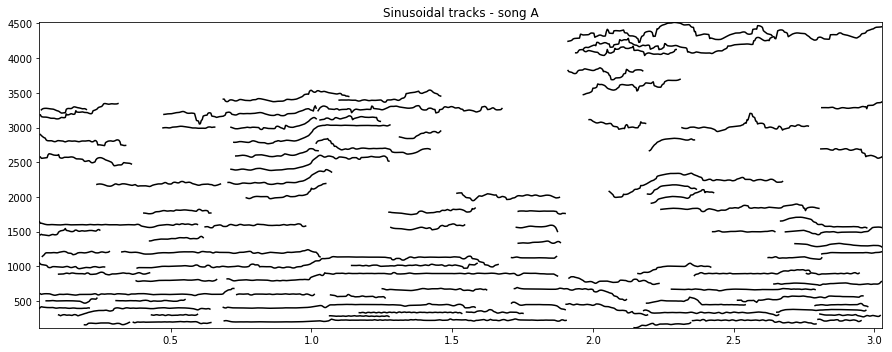

In [32]:
a = AudioSineModel('./audioa-c2eq1.wav')

In [33]:
IPython.display.Audio(a.filepath)

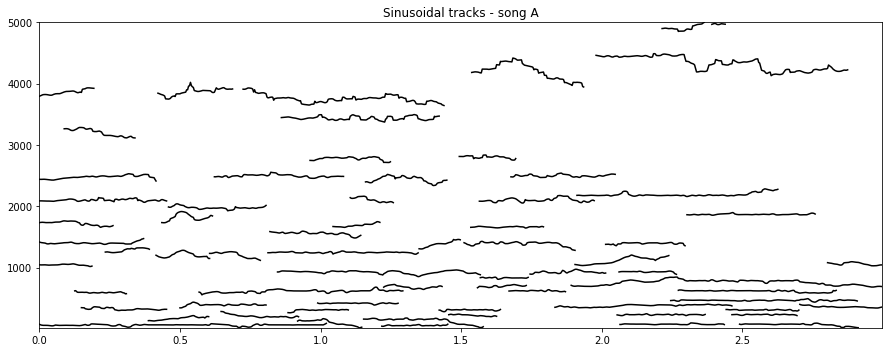

In [34]:
a  = AudioSineModel('./audiob.wav')

In [35]:
IPython.display.Audio(a.filepath)

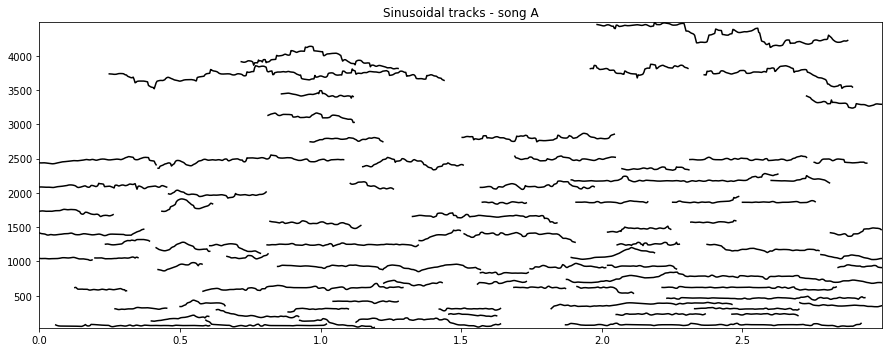

In [36]:
a = AudioSineModel('./audiob-c1.wav')IPython.display.Audio(a.filepath)

In [37]:
IPython.display.Audio(a.filepath)